In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import tensorflow as tf
import scipy.io as sio
import urllib

import matplotlib.pyplot as plt
import matplotlib.image as mim
from scipy import misc
from IPython.display import display
from PIL import Image, ImageOps, ImageDraw
import h5py
%matplotlib inline

In [2]:
FLAGS = tf.app.flags.FLAGS
tf.app.flags.DEFINE_string('directory', '/home/edward/git/tf_project/svhn_data',
                           'Directory to download data files and write the '
                           'converted result')

In [3]:
TRAIN_DATA = 'train.tar.gz'
TEST_DATA = 'test.tar.gz'
EXTRA_DATA = 'extra.tar.gz'

url = 'http://ufldl.stanford.edu/housenumbers/'

def maybe_download(filename, work_directory):
  """Download the data from Yann's website, unless it's already here."""
  if not os.path.exists(work_directory):
    os.mkdir(work_directory)
  filepath = os.path.join(work_directory, filename)
  if os.path.exists(filepath):
    print(filename, 'data has already existed')
  else:    
    filepath, _ = urllib.urlretrieve(url + filename, filepath)
    statinfo = os.stat(filepath)
    print('Succesfully downloaded', filename, statinfo.st_size, 'bytes.')
  return filepath

train_filename = maybe_download(TRAIN_DATA, FLAGS.directory)
test_filename = maybe_download(TEST_DATA, FLAGS.directory)
extra_filename = maybe_download(EXTRA_DATA, FLAGS.directory)

train.tar.gz data has already existed
test.tar.gz data has already existed
extra.tar.gz data has already existed


3277: 8



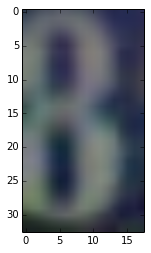

3277: 9



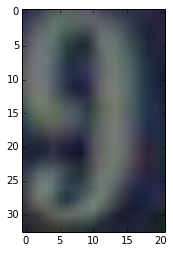

16824: 1



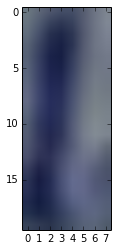

16824: 8



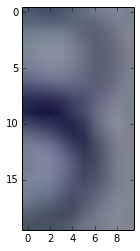

28352: 4



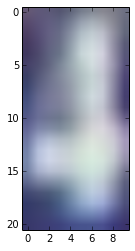

28352: 1



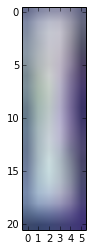

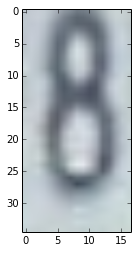

31377: 8

7478: 1



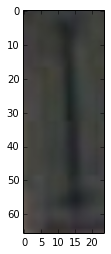

7478: 0



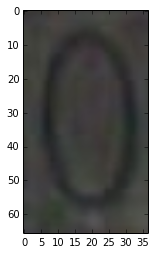

In [4]:
def show_images(data_dir):
    work_dir = os.path.join(FLAGS.directory, data_dir)
    filename = os.path.join(work_dir, 'digitStruct.mat')
    meta_data = sio.loadmat(filename, squeeze_me=True, struct_as_record=False)
    digitStruct = meta_data['digitStruct']
    
    for k in range(5): 
        i=int(np.random.choice(len(digitStruct),1))
        image_path = os.path.join(work_dir, digitStruct[i].name)
        im = mim.imread(image_path)
        height = im.shape[0]
        width = im.shape[1]
        if isinstance(digitStruct[i].bbox, np.ndarray):
            for j in range( len(digitStruct[i].bbox) ):                
                upper = max(digitStruct[i].bbox[j].top+1,1)
                lower = min(digitStruct[i].bbox[j].top+digitStruct[i].bbox[j].height, height)
                left = max(digitStruct[i].bbox[j].left+1,1)
                right = min(digitStruct[i].bbox[j].left+digitStruct[i].bbox[j].width, width) 
                print('%d: %d\n' % (i, digitStruct[i].bbox[j].label % 10) )
                plt.imshow( im[upper:lower, left:right, :] )
                plt.show()              
        else:
            upper = max(digitStruct[i].bbox.top+1,1)
            lower = min(digitStruct[i].bbox.top+digitStruct[i].bbox.height, height)
            left = max(digitStruct[i].bbox.left+1,1)
            right = min(digitStruct[i].bbox.left+digitStruct[i].bbox.width, width) 
            plt.imshow( im[upper:lower, left:right, :] )
            plt.show()
            print('%d: %d\n' % (i, digitStruct[i].bbox.label % 10) )        
       
    return

show_images('train')


/home/edward/git/tf_project/svhn_data/extra/46949.png
65 37


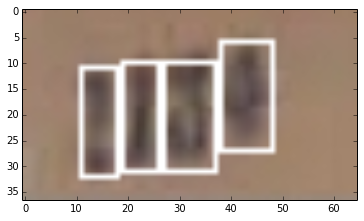

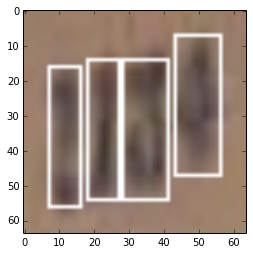

/home/edward/git/tf_project/svhn_data/extra/68763.png
96 47


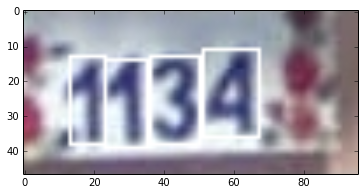

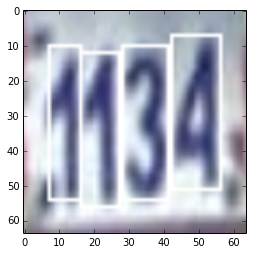

/home/edward/git/tf_project/svhn_data/extra/71082.png
124 72


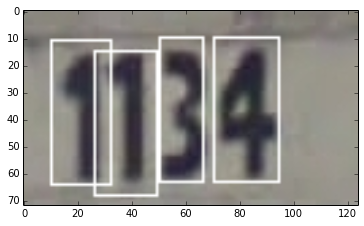

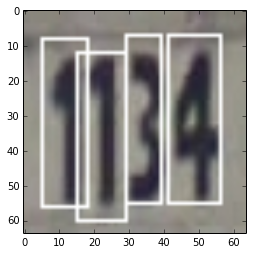

/home/edward/git/tf_project/svhn_data/extra/117270.png
136 70


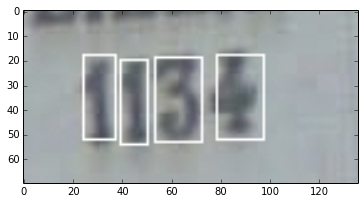

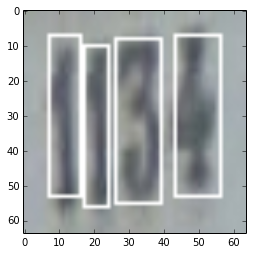

/home/edward/git/tf_project/svhn_data/extra/147624.png
137 60


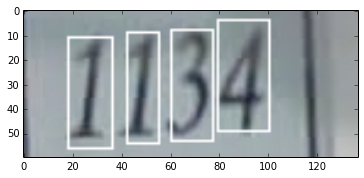

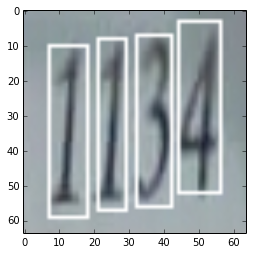

/home/edward/git/tf_project/svhn_data/extra/186034.png
95 75


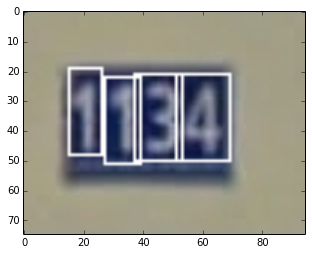

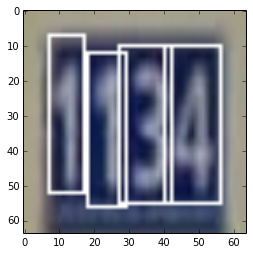

/home/edward/git/tf_project/svhn_data/extra/193649.png
63 41


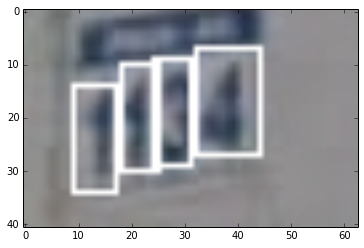

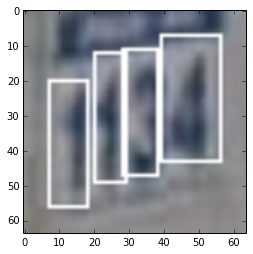

/home/edward/git/tf_project/svhn_data/extra/196988.png
73 34


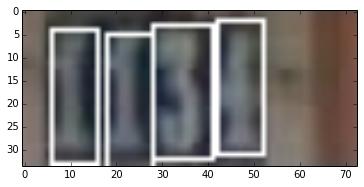

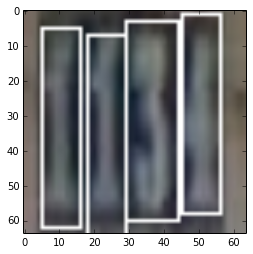

In [22]:
work_dir = os.path.join(FLAGS.directory, 'extra')
filename = os.path.join(work_dir, 'digitStruct.mat')
meta_data = sio.loadmat(filename, squeeze_me=True, struct_as_record=False)
digitStruct = meta_data['digitStruct']

nImages = len(digitStruct)

for i in range(nImages):
    
    bbox = digitStruct[i].bbox
    if isinstance(bbox, np.ndarray):
        nBoxes = len(bbox)
        if nBoxes == 4:
            a = bbox[0].label
            b = bbox[1].label
            c = bbox[2].label
            d = bbox[3].label
            if a == 1 and b == 1 and c == 3 and d == 4:
                image_path = os.path.join(work_dir, digitStruct[i].name)
                print (image_path)
    ######################################################################################
                im = Image.open(image_path)
                (width, height) = im.size
                print(width, height)

                draw = ImageDraw.Draw(im)                
                for j in range(nBoxes):
                    upper = max(bbox[j].top+1,1)
                    lower = min(bbox[j].top+bbox[j].height, height)                
                    left = max(bbox[j].left+1,1)
                    right = min(bbox[j].left+bbox[j].width, width)
                    draw.rectangle(((left, upper), (right, lower)))
                del draw

                plt.imshow(im)
                plt.show()
    ############################################################################################3

                upper_most = max(bbox[0].top+1,1)
                lower_most = min(bbox[0].top+bbox[0].height, height)
                for j in range(1, nBoxes):
                    upper_most = min( upper_most, max(bbox[j].top+1,1) )
                    lower_most = max( lower_most, min(bbox[j].top+bbox[j].height, height) )                              
                left_most = max(bbox[0].left+1,1)
                last_box = nBoxes - 1
                right_most = min(bbox[last_box].left+bbox[last_box].width, width)

                ## enlarge the thumnail area by 30% on x and y axises.
                delta_height_thumnail = (lower_most - upper_most) * 0.3 / 2.
                delta_width_thumnail = (right_most - left_most) * 0.3 / 2.
                
                ###shrink the thumnail area              
                upper_most = max( upper_most - delta_height_thumnail, 1 )
                lower_most = min( lower_most + delta_height_thumnail, height )
                left_most = max( left_most - delta_width_thumnail, 1 )
                right_most = min( right_most + delta_width_thumnail, width )
                
                im = Image.open(image_path)
                
                thumbnail_size = 64
                thumb = im.transform((thumbnail_size, thumbnail_size), method=Image.EXTENT, data=(left_most,upper_most,right_most,lower_most), resample=Image.BICUBIC, fill=1)
  
   
                width_transform = float(right_most - left_most)
                height_transform = float(lower_most - upper_most)
                draw = ImageDraw.Draw(thumb)                
                for j in range(nBoxes):
                    upper = max(bbox[j].top+1,1) - upper_most
                    upper = max(int(upper/height_transform*thumbnail_size), 1)

                    lower = min(bbox[j].top+bbox[j].height, height) - upper_most
                    lower = min(int(lower/height_transform*thumbnail_size), thumbnail_size)

                    left = max(bbox[j].left+1,1) - left_most
                    left = max(int(left/width_transform*thumbnail_size), 1) 

                    right = min(bbox[j].left+bbox[j].width, width) - left_most
                    right = min(int(right/width_transform*thumbnail_size), thumbnail_size)

                    draw.rectangle(((left, upper), (right, lower)))
                del draw

                plt.imshow( thumb )
                plt.show()
                

               
        
   

In [23]:
def transform_images(data_dir):
    work_dir = os.path.join(FLAGS.directory, data_dir)
    save_dir = os.path.join(FLAGS.directory, data_dir+'_processed')
    if not os.path.exists(save_dir):
        os.mkdir(save_dir)
    
    filename = os.path.join(work_dir, 'digitStruct.mat')
    meta_data = sio.loadmat(filename, squeeze_me=True, struct_as_record=False)
    digitStruct = meta_data['digitStruct']
    nImages = len(digitStruct)

    for i in range(nImages):
        image_path = os.path.join(work_dir, digitStruct[i].name)
        save_path = os.path.join(save_dir, digitStruct[i].name)
        
        if not os.path.exists(save_path): 
            im = Image.open(image_path)
            (width, height) = im.size
            
            bbox = digitStruct[i].bbox
            if not isinstance(bbox, np.ndarray):
                bbox = [bbox]                
            nBoxes = len(bbox)          
            
            ## box positions
            upper_most = max(bbox[0].top + 1,1)
            lower_most = min(bbox[0].top + bbox[0].height, height)
            left_most = max(bbox[0].left + 1,1)
            right_most = min( bbox[0].left + bbox[0].width, width)
            for j in range(1, nBoxes):
                upper_most = min( upper_most, max(bbox[j].top + 1,1) )
                lower_most = max( lower_most, min(bbox[j].top + bbox[j].height, height) )  
                left_most  = min( left_most, max(bbox[j].left + 1,1) )
                right_most = max( right_most, min(bbox[j].left + bbox[j].width, width) )

            ## enlarge the thumnail area by 30% on x and y axises.
            delta_height_thumnail = (lower_most - upper_most) * 0.3 / 2.
            delta_width_thumnail = (right_most - left_most) * 0.3 / 2.
            
            ###shrink the thumnail area              
            upper_most = max( upper_most - delta_height_thumnail, 1 )
            lower_most = min( lower_most + delta_height_thumnail, height )
            left_most = max( left_most - delta_width_thumnail, 1 )
            right_most = min( right_most + delta_width_thumnail, width )
             
            thumbnail_size = 64    
            thumb = im.transform((thumbnail_size, thumbnail_size), method=Image.EXTENT, data=(left_most,upper_most,right_most,lower_most), resample=Image.BICUBIC, fill=1)
            thumb.save(save_path, "png")
            
transform_images('test')   
transform_images('train')
transform_images('extra')

In [38]:
def extract_images_labels(data_dir, validation_size=-1, skip_image=[]):
        
    """Extract the images into a 4D uint8 numpy array [x, y, depth, index]."""
    print('Loading images and labels: ', data_dir) 
    work_dir = os.path.join(FLAGS.directory, data_dir)
    image_dir = os.path.join(FLAGS.directory, data_dir+'_processed')
    
    filename = os.path.join(work_dir, 'digitStruct.mat')
    if not os.path.exists(filename):
        print('Not exists')
        return
    meta_data = sio.loadmat(filename, squeeze_me=True, struct_as_record=False)
    digitStruct = meta_data['digitStruct']
    
    nImages = len(digitStruct)   
    images = np.zeros((nImages, 64, 64, 3), dtype=np.dtype(np.uint8))
    len_one_hot = np.zeros((nImages, 7), dtype=np.dtype(np.int8))
    labels_one_hot = np.zeros((nImages, 5, 11), dtype=np.dtype(np.int8))
    box_pos = np.zeros((nImages, 5, 4), dtype=np.dtype(np.float32))
    
    for i in range( len(digitStruct) ):        
        image_path = os.path.join(image_dir, digitStruct[i].name)
        im = misc.imread(image_path)
        images[i, :, :, :] = im
    ########################################################################    
        if i == 0:
            print('imread images[0]: ', images[0])        
    ########################################################################

        # Original image size
        image_path = os.path.join(work_dir, digitStruct[i].name)
        im = Image.open(image_path)
        (width, height) = im.size
        
        bbox = digitStruct[i].bbox
        if not isinstance(bbox, np.ndarray):
            bbox = [bbox]
        nBoxes = len(bbox)
        len_one_hot[i, nBoxes] = 1        
        if nBoxes == 0:
            continue
        
        ## box positions
        upper_most = max(bbox[0].top + 1,1)
        lower_most = min(bbox[0].top + bbox[0].height, height)
        left_most = max(bbox[0].left + 1,1)
        right_most = min( bbox[0].left + bbox[0].width, width)
        for j in range(1, nBoxes):
            upper_most = min( upper_most, max(bbox[j].top + 1,1) )
            lower_most = max( lower_most, min(bbox[j].top + bbox[j].height, height) )  
            left_most  = min( left_most, max(bbox[j].left + 1,1) )
            right_most = max( right_most, min(bbox[j].left + bbox[j].width, width) )

        ## enlarge the thumnail area by 30% on x and y axises.
        delta_height_thumnail = (lower_most - upper_most) * 0.3 / 2.
        delta_width_thumnail = (right_most - left_most) * 0.3 / 2.
        
        ###shrink the thumnail area              
        upper_most = max( upper_most - delta_height_thumnail, 1 )
        lower_most = min( lower_most + delta_height_thumnail, height )
        left_most = max( left_most - delta_width_thumnail, 1 )
        right_most = min( right_most + delta_width_thumnail, width )
        
        thumbnail_size = 64
        
        width_transform = float(right_most - left_most)
        height_transform = float(lower_most - upper_most)
                
        if nBoxes > 5:
            nBoxes = 5                                
        
        ## laels
        for j in range(nBoxes): 
            labels_one_hot[i, j, bbox[j].label % 10] = 1
        for j in range(nBoxes, 5):
            labels_one_hot[i, j, -1] = 1
                
        for j in range(nBoxes):            
            try:            
                upper = max(bbox[j].top + 1,1) - upper_most
                upper = max(int(upper/height_transform*thumbnail_size), 1)
                upper = float(upper) / thumbnail_size

                lower = min(bbox[j].top + bbox[j].height, height) - upper_most
                lower = min(int(lower/height_transform*thumbnail_size), thumbnail_size)
                lower = float(lower) / thumbnail_size

                left = max(bbox[j].left + 1,1) - left_most
                left = max(int(left/width_transform*thumbnail_size), 1) 
                left = float(left) / thumbnail_size

                right = min(bbox[j].left + bbox[j].width, width) - left_most
                right = min(int(right/width_transform*thumbnail_size), thumbnail_size)
                right = float(right) / thumbnail_size

                box_pos[i, j, :] = [left, upper, right, lower]
                
            except ZeroDivisionError: ## if the left and right box pos isn't stored in the matrix in order, there is zero division 
                if j == 0:
                    print(i, image_path)
                    print(nBoxes, bbox[0].left, bbox[last_box].left, bbox[last_box].width, width)
                    draw = ImageDraw.Draw(im)                
                    for j in range(nBoxes):
                        upper = max(bbox[j].top+1,1)
                        lower = min(bbox[j].top+bbox[j].height, height)                
                        left = max(bbox[j].left+1,1)
                        right = min(bbox[j].left+bbox[j].width, width)
                        draw.rectangle(((left, upper), (right, lower)))
                    del draw
                    plt.imshow(im)
                    plt.show()
                continue                
    ########################################################################    
        if i == 0:
            print('box pos[0]: ', box_pos[0, 0, :])        
    ######################################################################## 
    # delete the images with wrong labels in skip_images
    if len(skip_image) > 0:
        images = np.delete(images, skip_image, axis=0)
        len_one_hot = np.delete(len_one_hot, skip_image, axis=0)
        labels_one_hot = np.delete(labels_one_hot, skip_image, axis=0)
        box_pos = np.delete(box_pos, skip_image, axis=0)
        
##########################################         
    if validation_size > 0:
        nImages = len(images)
        valid_index = np.random.randint(0, nImages, size=validation_size)
        train_index = np.setxor1d(range(nImages), valid_index).astype(int)
        
        valid_images = images[valid_index]
        valid_len_one_hot = len_one_hot[valid_index]
        valid_labels_one_hot = labels_one_hot[valid_index]
        valid_box_pos = box_pos[valid_index]
        
        images = images[train_index]
        len_one_hot = len_one_hot[train_index]
        labels_one_hot = labels_one_hot[train_index]
        box_pos = box_pos[train_index]
    else:        
        valid_images = np.zeros((1, 64, 64, 3), dtype=np.dtype(np.uint8))
        valid_len_one_hot = np.zeros((1, 7), dtype=np.dtype(np.int8))
        valid_labels_one_hot = np.zeros((1, 5, 11), dtype=np.dtype(np.int8))
        valid_box_pos = np.zeros((1, 5, 4), dtype=np.dtype(np.float32))
########################################## 

    return images, len_one_hot, labels_one_hot, box_pos, valid_images, valid_len_one_hot, valid_labels_one_hot, valid_box_pos




In [40]:
def _int64_feature(value):
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def _bytes_feature(value):
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))


def convert_to(images, len_one_hot, labels_one_hot, box, name):
  num_examples = len(labels_one_hot)
  if images.shape[0] != num_examples:
    raise ValueError("Images size %d does not match label size %d." %
                     (images.shape[0], num_examples))

  dir = os.path.join(FLAGS.directory, 'svhn_data_recordes_with_extra')
  filename = os.path.join(dir, name + '.tfrecords')

#   print('copy to the new matrix',images[0])  
    
  if not os.path.exists(filename):        
    print('Writing', filename)
    writer = tf.python_io.TFRecordWriter(filename)
    
    print('images')
    print(images.shape)
    print('len_one_hot')
    print(len_one_hot.shape)
    print('labels_one_hot')
    print(labels_one_hot.shape)
    
    for index in range(num_examples):        
      image_raw = images[index].tostring()
      len_raw = len_one_hot[index].tostring()
      label_raw = labels_one_hot[index].tostring()
      box_pos_raw = box[index].tostring()
    
      example = tf.train.Example(features=tf.train.Features(feature={
          'len'  : _bytes_feature(len_raw),        
          'label': _bytes_feature(label_raw),
          'box'  : _bytes_feature(box_pos_raw),               
          'image_raw': _bytes_feature(image_raw)}))
      writer.write(example.SerializeToString())
  else:
    print('File has already been existed.')
    
test_images, test_len, test_labels, test_box_pos, _, _, _, _ = extract_images_labels('test')
print('test images dimensions:',test_images.shape)    

# # Convert to Examples and write the result to TFRecords.
convert_to(test_images, test_len, test_labels, test_box_pos, 'test_processed')
del test_images, test_len, test_labels, test_box_pos    

extra_images, extra_len, extra_labels, extra_box_pos, valid_images, valid_len, valid_labels, valid_box_pos = extract_images_labels('extra', 10000, [58818,159966])
print('validation images dimensions:',valid_images.shape)    

train_images, train_len, train_labels, train_box_pos, _, _, _, _ = extract_images_labels('train')
train_images = np.concatenate((train_images, extra_images), axis=0)
train_len = np.concatenate((train_len, extra_len), axis=0)
train_labels = np.concatenate((train_labels, extra_labels), axis=0)
train_box_pos = np.concatenate((train_box_pos, extra_box_pos), axis=0)
print('train images dimensions:',train_images.shape)

convert_to(train_images, train_len, train_labels, train_box_pos, 'train_processed')
del train_images, train_len, train_labels, train_box_pos

convert_to(valid_images, valid_len, valid_labels, valid_box_pos, 'valid_processed')
del valid_images, valid_len, valid_labels, valid_box_pos

Loading images and labels:  test
imread images[0]:  [[[ 41 102  64]
  [ 42 102  64]
  [ 42 101  65]
  ..., 
  [ 40 101  61]
  [ 40 101  60]
  [ 39 100  59]]

 [[ 40 103  63]
  [ 41 102  64]
  [ 41 102  65]
  ..., 
  [ 40 100  62]
  [ 40 101  61]
  [ 40 101  59]]

 [[ 40 103  62]
  [ 41 102  63]
  [ 41 102  64]
  ..., 
  [ 40 101  62]
  [ 40 101  61]
  [ 40 101  60]]

 ..., 
 [[ 47 114  71]
  [ 46 113  71]
  [ 46 112  71]
  ..., 
  [ 38 114  73]
  [ 38 114  73]
  [ 38 114  72]]

 [[ 50 117  74]
  [ 50 116  74]
  [ 49 115  74]
  ..., 
  [ 38 114  74]
  [ 38 114  73]
  [ 38 114  72]]

 [[ 54 120  78]
  [ 54 119  78]
  [ 54 118  77]
  ..., 
  [ 38 112  72]
  [ 38 112  72]
  [ 38 111  71]]]
box pos[0]:  [ 0.109375  0.109375  0.875     0.875   ]
test images dimensions: (13068, 64, 64, 3)
Writing /home/edward/git/tf_project/svhn_data/svhn_data_recordes_with_extra/test_processed.tfrecords
images
(13068, 64, 64, 3)
len_one_hot
(13068, 7)
labels_one_hot
(13068, 5, 11)
Loading images and labels: 

/home/edward/git/tf_project/svhn_data/svhn_data_recordes_with_extra/train_processed.tfrecords
[[[130 123 115]
  [127 122 114]
  [125 123 113]
  ..., 
  [103 109  99]
  [102 108  99]
  [ 99 104  97]]

 [[130 124 115]
  [128 123 114]
  [125 123 114]
  ..., 
  [104 110 100]
  [103 109 100]
  [100 105  98]]

 [[130 125 116]
  [127 123 114]
  [125 123 113]
  ..., 
  [105 111 101]
  [104 109 101]
  [101 106  98]]

 ..., 
 [[119 114 108]
  [122 119 113]
  [125 123 118]
  ..., 
  [104 105 104]
  [ 96  99  97]
  [ 91  93  91]]

 [[118 114 108]
  [122 118 113]
  [125 122 117]
  ..., 
  [ 98  99  99]
  [ 91  93  92]
  [ 86  88  87]]

 [[118 114 109]
  [122 118 113]
  [125 122 118]
  ..., 
  [ 91  92  92]
  [ 85  87  87]
  [ 81  83  83]]]


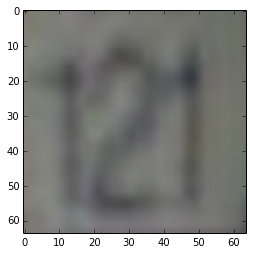

[[[136 118  96]
  [137 118  98]
  [135 118  99]
  ..., 
  [135 110  98]
  [135 111  98]
  [137 112 100]]

 [[130 114  94]
  [133 116  97]
  [131 116  97]
  ..., 
  [132 110  97]
  [133 111  98]
  [135 113 100]]

 [[130 113  94]
  [131 116  97]
  [130 115  96]
  ..., 
  [132 110  97]
  [134 112  99]
  [135 113 100]]

 ..., 
 [[146 130 115]
  [147 133 118]
  [148 133 119]
  ..., 
  [148 132 116]
  [148 132 116]
  [148 131 115]]

 [[145 131 116]
  [146 134 118]
  [147 135 120]
  ..., 
  [146 130 114]
  [146 130 114]
  [146 130 114]]

 [[145 132 115]
  [147 134 118]
  [148 135 119]
  ..., 
  [144 128 112]
  [144 129 110]
  [143 128 109]]]


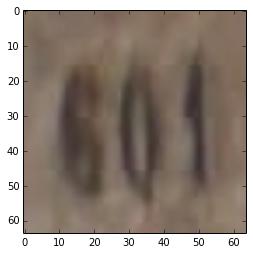

[[[148 152 153]
  [147 151 152]
  [146 150 153]
  ..., 
  [139 145 145]
  [140 145 145]
  [139 144 147]]

 [[150 154 154]
  [148 152 153]
  [147 151 155]
  ..., 
  [140 146 146]
  [140 147 146]
  [139 144 148]]

 [[153 157 159]
  [151 155 157]
  [150 154 158]
  ..., 
  [140 146 147]
  [141 146 148]
  [140 145 148]]

 ..., 
 [[159 163 162]
  [162 166 165]
  [163 167 167]
  ..., 
  [188 192 195]
  [188 192 195]
  [194 198 201]]

 [[149 153 152]
  [150 154 153]
  [151 155 157]
  ..., 
  [187 191 194]
  [186 190 193]
  [189 193 196]]

 [[141 145 144]
  [141 145 144]
  [142 146 147]
  ..., 
  [185 189 192]
  [185 189 192]
  [189 193 196]]]


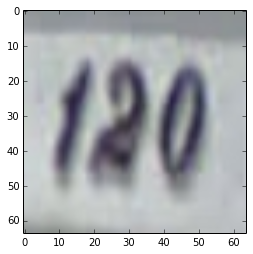

[[[147 152 163]
  [148 152 163]
  [148 152 163]
  ..., 
  [141 144 156]
  [142 145 157]
  [144 146 158]]

 [[134 139 150]
  [134 139 150]
  [134 139 150]
  ..., 
  [132 136 148]
  [134 137 149]
  [135 139 150]]

 [[127 132 143]
  [127 132 143]
  [127 131 143]
  ..., 
  [129 133 145]
  [131 134 146]
  [132 136 148]]

 ..., 
 [[103 103 122]
  [104 104 123]
  [104 104 123]
  ..., 
  [ 93  89 106]
  [ 90  87 103]
  [ 88  85 101]]

 [[ 97  95 115]
  [ 97  96 116]
  [ 97  96 116]
  ..., 
  [ 87  84 100]
  [ 85  82  98]
  [ 83  79  96]]

 [[ 88  85 105]
  [ 88  86 106]
  [ 89  86 106]
  ..., 
  [ 82  78  95]
  [ 80  76  93]
  [ 78  74  91]]]


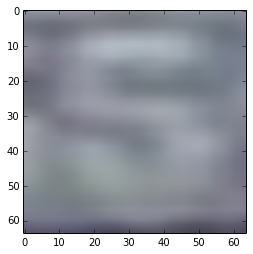

[[[51 39 24]
  [50 38 24]
  [49 37 24]
  ..., 
  [39 32 14]
  [41 33 16]
  [42 35 18]]

 [[49 37 21]
  [47 35 21]
  [46 34 22]
  ..., 
  [37 30 13]
  [38 31 16]
  [39 32 17]]

 [[48 34 19]
  [46 32 20]
  [45 31 21]
  ..., 
  [34 28 13]
  [34 28 14]
  [34 28 14]]

 ..., 
 [[25 22 10]
  [27 23 12]
  [28 24 13]
  ..., 
  [50 39 16]
  [47 38 13]
  [46 36 10]]

 [[28 23 12]
  [30 25 13]
  [30 25 13]
  ..., 
  [51 41 17]
  [50 40 14]
  [48 38 12]]

 [[34 27 15]
  [35 28 15]
  [35 28 15]
  ..., 
  [53 42 19]
  [52 41 18]
  [51 41 16]]]


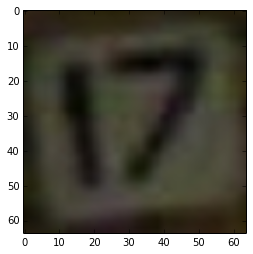

In [41]:
from svhn_input import read_svhn

def input_pipeline(example, label, batch_size=5, num_epochs=None):
    
  min_after_dequeue = 100
  capacity = min_after_dequeue + 3 * batch_size
  example_batch, label_batch = tf.train.shuffle_batch(
      [example, label], batch_size=batch_size, capacity=capacity,
      min_after_dequeue=min_after_dequeue)
  return example_batch, label_batch

def validify_images(name):
    dir = os.path.join(FLAGS.directory, 'svhn_data_recordes_with_extra')
    filename = os.path.join(dir, name + '.tfrecords')
    print(filename)

    if not os.path.exists(filename):
        print ('not exists')
        return
    else:
        # Create a queue that produces the filenames to read.
        filename_queue = tf.train.string_input_producer([filename])    

        # Read examples from files in the filename queue.
        read_input = read_svhn(filename_queue)
        image = read_input.uint8image
        length =  read_input.length
        digits = read_input.label

        image_batch, length_batch = input_pipeline(image, length, batch_size=5, num_epochs=None)
        
        init_op = tf.initialize_all_variables()       
        with tf.Session() as sess:
            sess.run(init_op)
        
            # Start populating the filename queue.
            coord = tf.train.Coordinator()
            threads = tf.train.start_queue_runners(coord=coord, sess=sess)
            
            result = sess.run(image_batch)
        
        for i in range(len(result)):
            print(result[i])
            plt.imshow(result[i])
            plt.show()
    
        coord.request_stop()

validify_images('train_processed')      